In [4]:
! pip install ucimlrepo

In [6]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

wine_quality = fetch_ucirepo(id=186)
df = pd.concat([wine_quality.data.features, wine_quality.data.targets], axis=1)

In [8]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [9]:
df.shape

(6497, 12)

In [11]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.mean()

fixed_acidity             7.215307
volatile_acidity          0.339666
citric_acid               0.318633
residual_sugar            5.443235
chlorides                 0.056034
free_sulfur_dioxide      30.525319
total_sulfur_dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

In [13]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

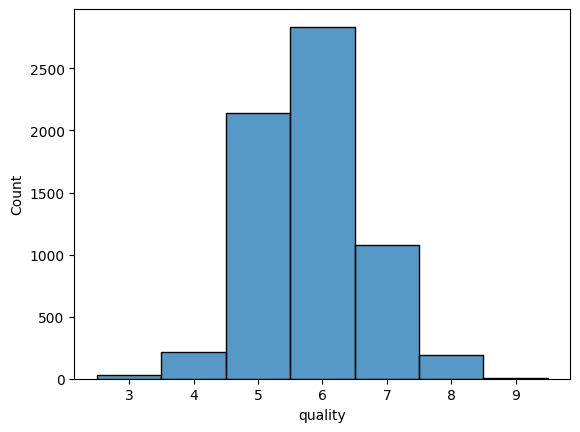

In [17]:
import seaborn as sns

sns.histplot(data=df, x='quality', discrete=True)
df['quality'].value_counts().sort_index()

In [18]:
df.duplicated().sum()

np.int64(1179)

In [19]:
df.shape

(6497, 12)

In [22]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='fixed_acidity', ylabel='residual_sugar'>

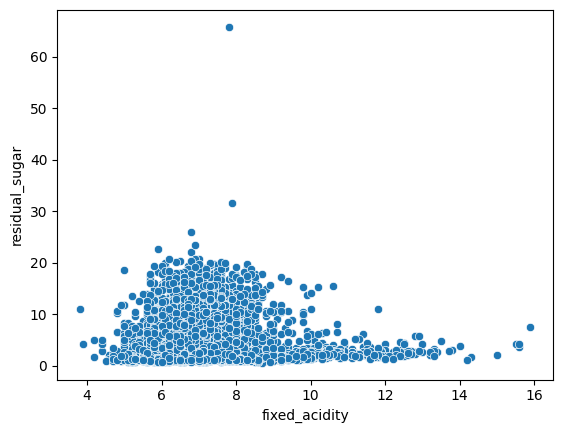

In [25]:
sns.scatterplot(df, x='fixed_acidity', y='residual_sugar')

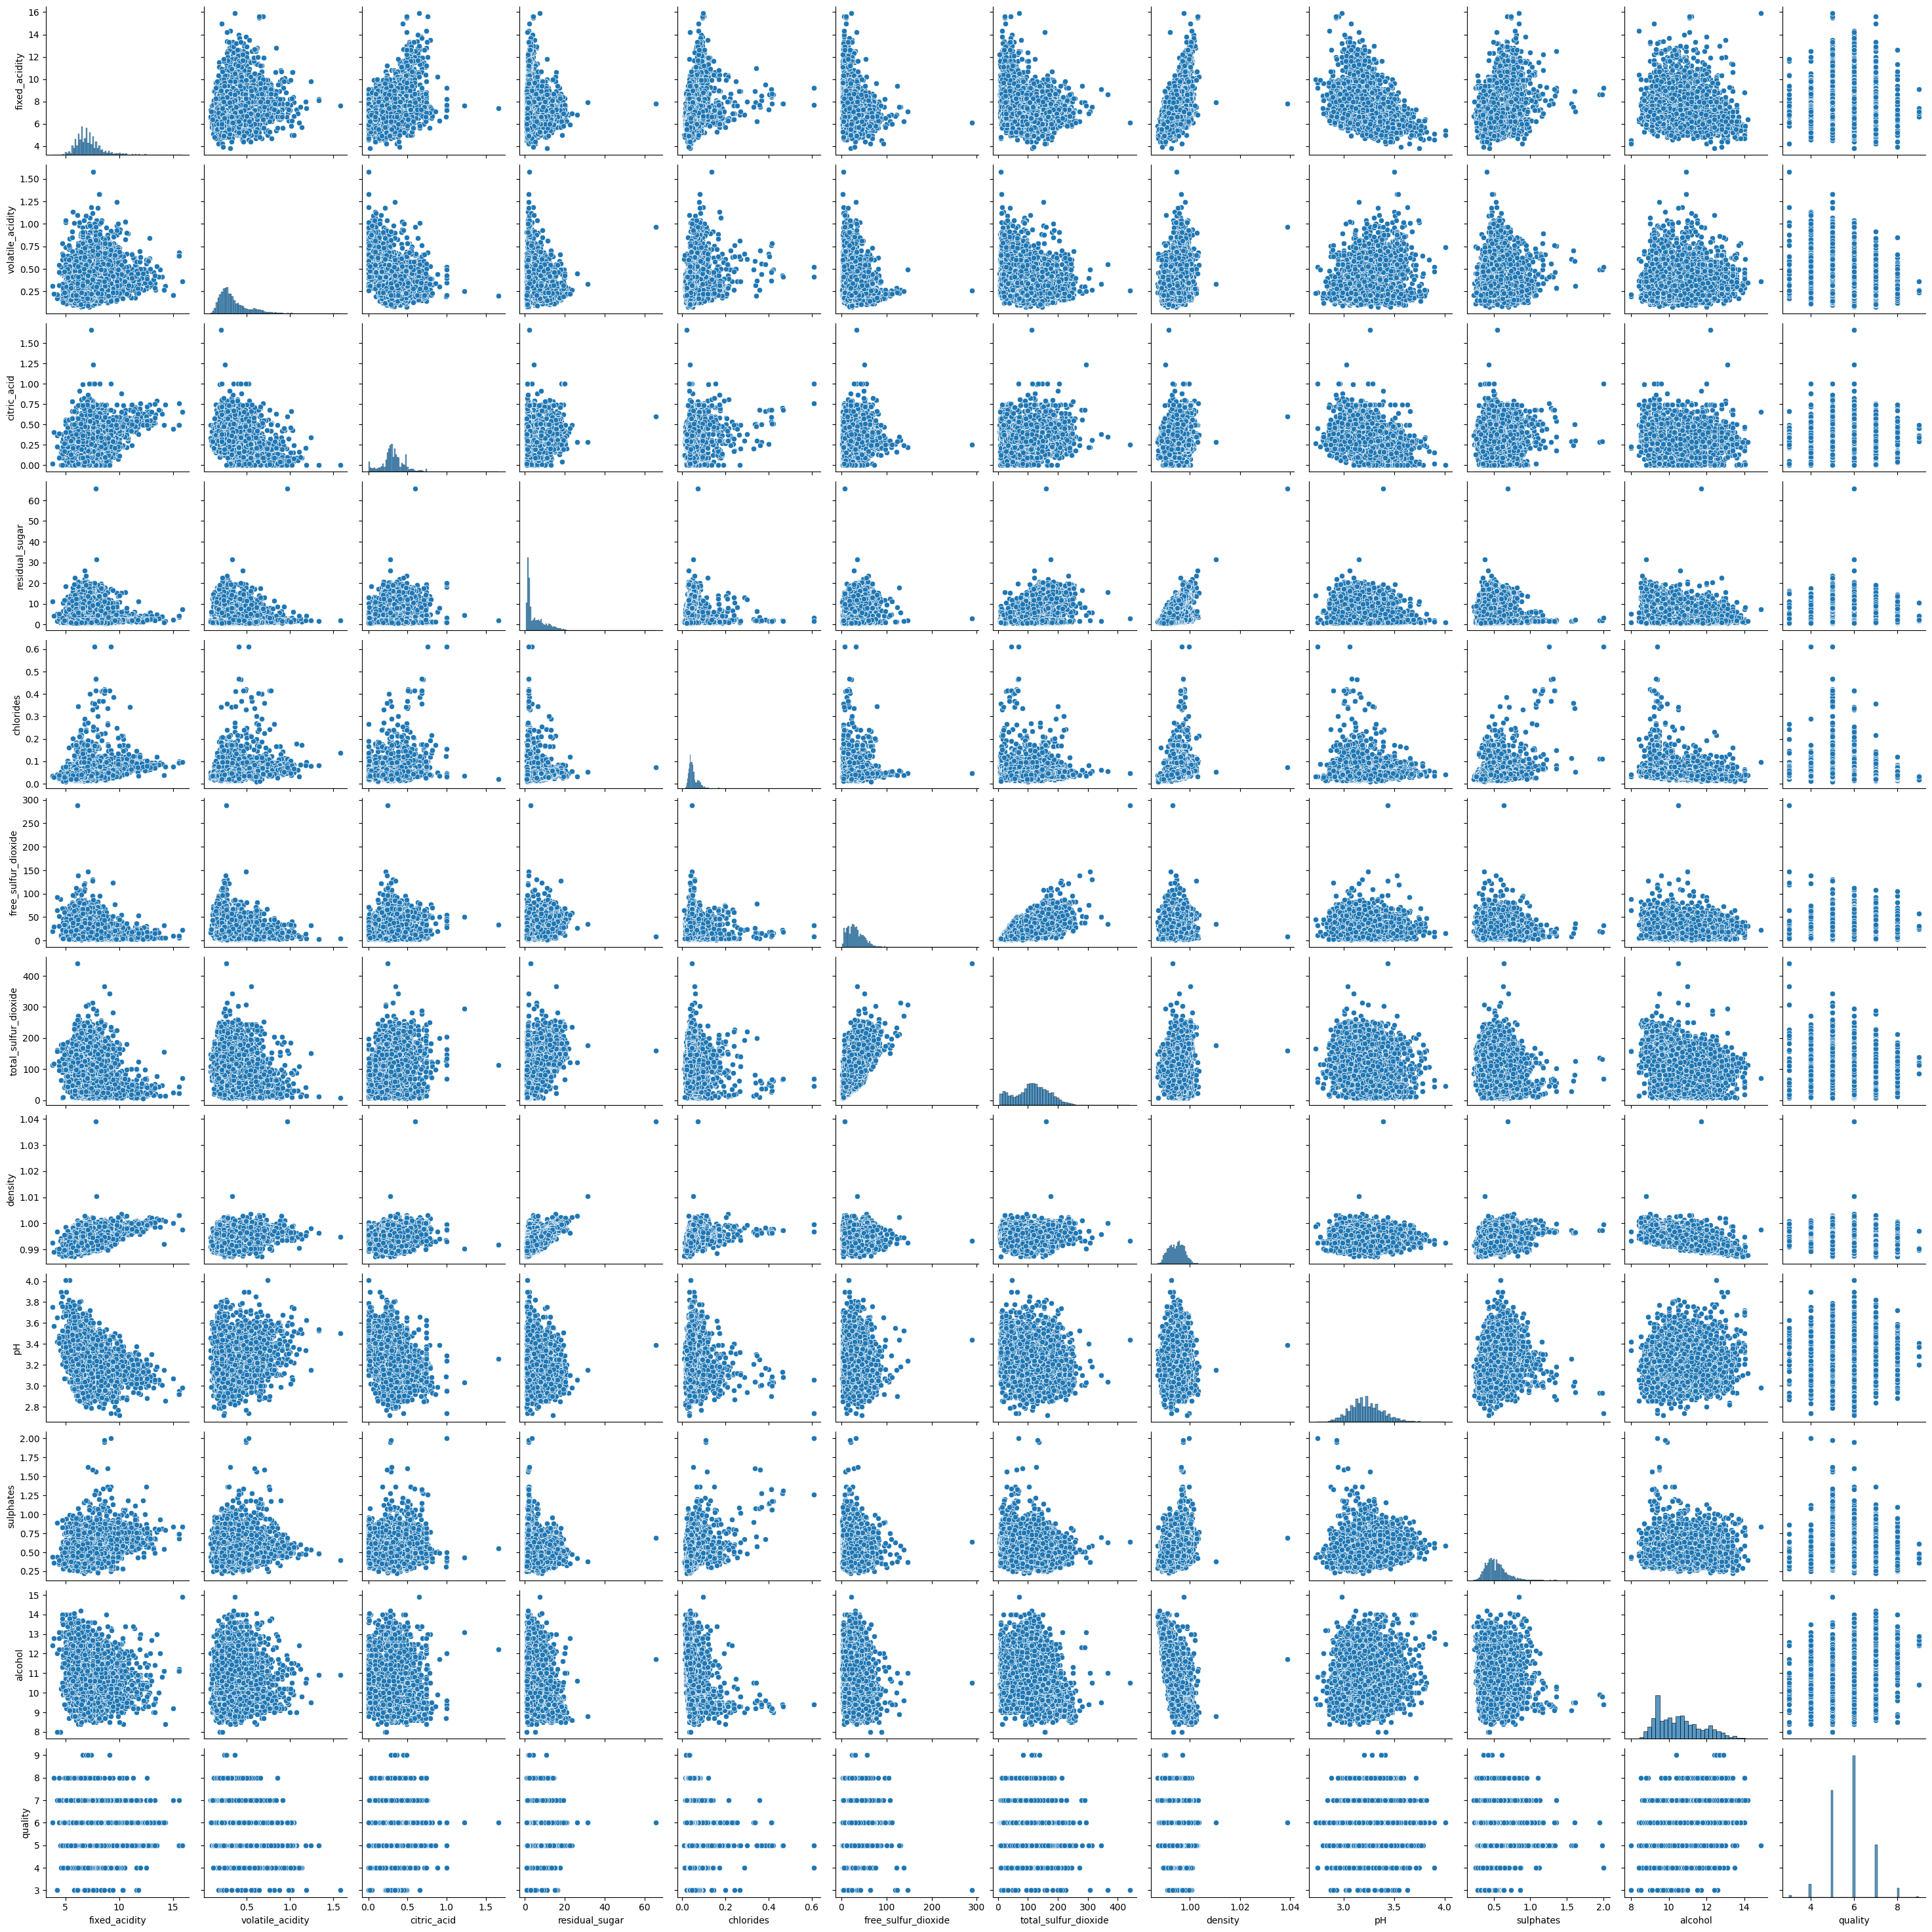

In [26]:
sns.pairplot(df)

In [27]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.214595,0.330225,-0.104641,0.288843,-0.281375,-0.327462,0.478148,-0.271094,0.304728,-0.102696,-0.080190
volatile_acidity,0.214595,1.000000,-0.384395,-0.163896,0.367573,-0.348865,-0.400715,0.308375,0.246837,0.227645,-0.065510,-0.265354
citric_acid,0.330225,-0.384395,1.000000,0.146078,0.055107,0.131113,0.194888,0.094663,-0.344675,0.059061,-0.005572,0.097926
residual_sugar,-0.104641,-0.163896,0.146078,1.000000,-0.123302,0.399090,0.487593,0.520867,-0.234443,-0.174946,-0.305334,-0.056824
chlorides,0.288843,0.367573,0.055107,-0.123302,1.000000,-0.186518,-0.269896,0.371665,0.025914,0.404905,-0.269516,-0.201960
free_sulfur_dioxide,-0.281375,-0.348865,0.131113,0.399090,-0.186518,1.000000,0.720576,0.006360,-0.141968,-0.198075,-0.169887,0.054199
total_sulfur_dioxide,-0.327462,-0.400715,0.194888,0.487593,-0.269896,0.720576,1.000000,0.006677,-0.223000,-0.275877,-0.248942,-0.050183
density,0.478148,0.308375,0.094663,0.520867,0.371665,0.006360,0.006677,1.000000,0.034377,0.282494,-0.667861,-0.326301
pH,-0.271094,0.246837,-0.344675,-0.234443,0.025914,-0.141968,-0.223000,0.034377,1.000000,0.168287,0.097392,0.039789
sulphates,0.304728,0.227645,0.059061,-0.174946,0.404905,-0.198075,-0.275877,0.282494,0.168287,1.000000,-0.017166,0.042040


<Axes: >

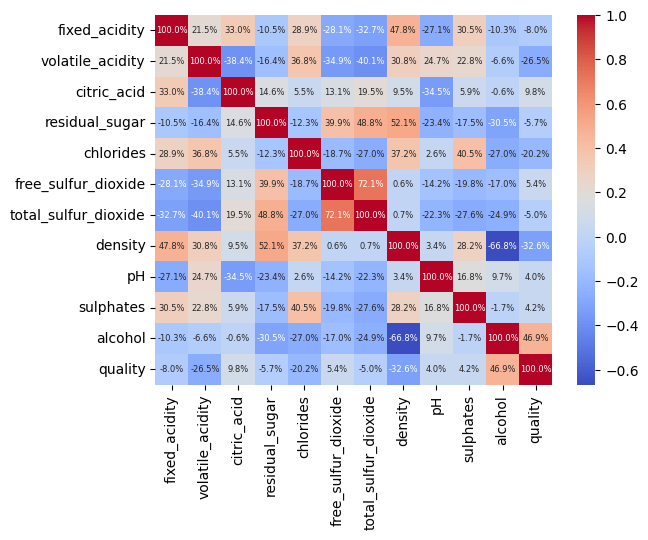

In [29]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True,fmt='.1%', annot_kws={'size': 6})

In [30]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

In [31]:
df_train.shape

(3722, 12)

In [32]:
df_test.shape

(1596, 12)

In [33]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [34]:
from sklearn.preprocessing import StandardScaler

model_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
              'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
              'total_sulfur_dioxide', 'density', 'pH', 'sulphates','alcohol']

scaler = StandardScaler()
scaler.fit(df_train[model_cols])

df_train[model_cols] = scaler.transform(df_train[model_cols])

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [38]:
%%time

reg.fit(X=df_train[model_cols], y=df_train['quality'])

CPU times: total: 15.6 ms
Wall time: 12 ms


LinearRegression()

In [39]:
print('termo b:', reg.intercept_)
print('temo a:')
dict(zip(model_cols, reg.coef_))

termo b: 5.7984954325631355
temo a:


{'fixed_acidity': np.float64(0.08661891446419824),
 'volatile_acidity': np.float64(-0.19456272104618536),
 'citric_acid': np.float64(0.015819297062154764),
 'residual_sugar': np.float64(0.1742872634454742),
 'chlorides': np.float64(-0.0275929002933388),
 'free_sulfur_dioxide': np.float64(0.14318242596966918),
 'total_sulfur_dioxide': np.float64(-0.15742734749783815),
 'density': np.float64(-0.18485703181635593),
 'pH': np.float64(0.09355155169594147),
 'sulphates': np.float64(0.12409508472749993),
 'alcohol': np.float64(0.311470245543372)}

In [40]:
df_train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
294,4.619562,-0.004819,1.383731,-0.416083,1.068382,-0.749101,-1.088023,2.283764,-1.095154,1.858285,-0.874610,6
1550,-0.084671,2.041444,-2.196607,-0.612939,0.869540,-0.749101,-1.565354,1.092027,1.398637,-0.016714,-0.874610,5
1900,0.825826,-0.847397,0.213236,-0.919158,-0.181479,-1.038218,-0.716765,-0.854144,-0.596396,-1.021178,-0.036414,6


In [41]:
from sklearn.metrics import mean_squared_error

preds = reg.predict(df_train[model_cols])

mse_treino = mean_squared_error(y_true=df_train['quality'], y_pred=preds)
print('MSE no conjunto de treino:', mse_treino)

MSE no conjunto de treino: 0.528680442915645


In [44]:
from sklearn.metrics import mean_squared_error

print('MSE no conjunto de treino:', mse_treino)
rmse_treino = mean_squared_error(df_train['quality'], preds) ** 0.5
print('RMSE no conjunto de treino:', rmse_treino)

MSE no conjunto de treino: 0.528680442915645
RMSE no conjunto de treino: 0.7271041486029667


In [45]:
from sklearn.metrics import mean_absolute_error

mape_treino = mean_absolute_error(y_true=df_train['quality'], y_pred=preds)
print('MAPE no conjunto de treino:', mape_treino)

MAPE no conjunto de treino: 0.5623866303674371


<Axes: xlabel='y_pred', ylabel='Count'>

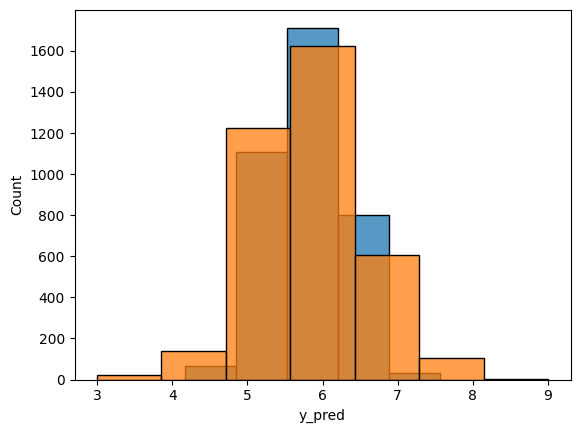

In [47]:
df_train['y_pred'] = preds
sns.histplot(df_train, x='y_pred', bins=5, kde=False)
sns.histplot(df_train, x='quality', bins=7, kde=False)

<Axes: xlabel='y_pred_rounded', ylabel='Count'>

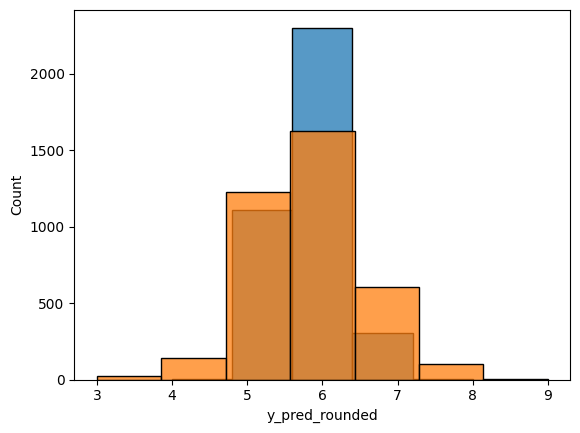

In [49]:
df_train['y_pred_rounded'] = df_train['y_pred'].round()

sns.histplot(df_train, x='y_pred_rounded', bins=5, kde=False)
sns.histplot(df_train, x='quality', bins=7, kde=False)